MINISTÉRIO DA EDUCAÇÃO

UNIVERSIDADE FEDERAL DO PIAUÍ

CAMPUS MINISTRO PETRÔNIO PORTELLA

CENTRO DE EDUCAÇÃO ABERTA E A DISTÂNCIA

CURSO DE TECNOLOGIA EM GESTÃO DE DADOS

Professor: Martony Demes da Silva

Aluno:Maria do rosário Alves de Oleveira Filha



#🌸 Tema do Projeto:
Classificação de Espécies de Flores com Aprendizado de Máquina

#Definição do problema
A identificação de espécies de flores pode ser complexa quando feita apenas por observação visual. A proposta é desenvolver um modelo de classificação que reconheça automaticamente a espécie de uma flor com base em características morfológicas, como comprimento e largura das pétalas e sépalas.

#Justificativa da escolha
O Iris Dataset é amplamente reconhecido como uma das bases de dados mais utilizadas em estudos de Aprendizado de Máquina, justamente por sua simplicidade e clareza. Ele oferece um cenário ideal para aplicar modelos supervisionados, permitindo alcançar altos níveis de precisão com algoritmos relativamente simples.

Além disso, o conjunto de dados é especialmente útil para ilustrar diferentes abordagens de classificação. Por exemplo, a Árvore de Decisão permite explicar decisões com base em regras claras e hierárquicas, enquanto o K-Nearest Neighbors (KNN) utiliza o conceito de vizinhança para determinar a classe de uma amostra, o que torna o processo intuitivo e fácil de compreender.

Sua estrutura enxuta e bem organizada facilita a implementação dos modelos, mesmo para quem está dando os primeiros passos na área. Por ser pequeno, bem rotulado e visualmente interpretável, o Iris Dataset também se destaca como uma excelente ferramenta para a visualização dos resultados e para a compreensão prática do funcionamento dos algoritmos de classificação..

#Definição da proposta a ser estudada
Dataset	Iris Dataset (disponível no scikit-learn)
Modelos de ML	KNN (K-Nearest Neighbors) e Árvore de Decisão
Objetivo	Classificar flores em três espécies: Setosa, Versicolor e Virginica
Metodologia	- Importação e visualização dos dados<br>- Separação em treino e teste<br>- Treinamento dos modelos<br>- Avaliação por acurácia e matriz de confusão<br>- Visualização dos resultados com gráficos

#Ferramentas e bibliotecas
Plataforma	Google Colab (organização e execução do código),

Bibliotecas	Pandas, Scikit-learn, Matplotlib,

Apresentação	Slides

#2ª Etapa: Implementação
 1. Importação das bibliotecas

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


🌸 2. Carregamento e visualização do dataset

In [43]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)

# Visualização inicial
print(X.head())
print("Classes:", iris.target_names)


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
Classes: ['setosa' 'versicolor' 'virginica']


Verificação de Limpeza

In [44]:
# Verificar valores nulos
print("Valores nulos por coluna:")
print(X.isnull().sum())

# Verificar duplicatas
print("\nNúmero de linhas duplicadas:", X.duplicated().sum())

# Estatísticas descritivas
print("\nResumo estatístico:")
print(X.describe())

# Verificar distribuição das classes
print("\nDistribuição das classes:")
print(y.value_counts())


Valores nulos por coluna:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

Número de linhas duplicadas: 1

Resumo estatístico:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.50000

 remover a linha duplicada

In [45]:
# Verificar duplicatas
duplicadas = X.duplicated()
print("Número de linhas duplicadas:", duplicadas.sum())

# Remover duplicatas
X_clean = X[~duplicadas].reset_index(drop=True)
y_clean = y[~duplicadas].reset_index(drop=True)


Número de linhas duplicadas: 1


Durante a etapa de inspeção da base de dados, foi identificada uma linha duplicada no Iris Dataset. Embora o impacto seja mínimo, optou-se por remover essa duplicata para garantir a integridade estatística do conjunto de dados. Após a limpeza, o conjunto passou a conter 149 amostras únicas, mantendo a distribuição equilibrada entre as classes.

3. Separação dos dados em treino e teste

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


4. Treinamento dos modelos
KNN

In [47]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)


Random Forest, SVM e Logistic Regression

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# SVM
svm = SVC(random_state=42)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

# Logistic Regression
logreg = LogisticRegression(max_iter=200, random_state=42)
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)

# Avaliação
from sklearn.metrics import classification_report

print("Random Forest:\n", classification_report(y_test, rf_pred))
print("SVM:\n", classification_report(y_test, svm_pred))
print("Logistic Regression:\n", classification_report(y_test, logreg_pred))


Random Forest:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

SVM:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Logistic Regression:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.

Todas as métricas são 1.00 (100%) → Isso significa que os três modelos classificaram corretamente todas as amostras de teste.

Classes 0, 1 e 2 (Setosa, Versicolor e Virginica) foram todas identificadas sem erros.

Macro avg e Weighted avg = 1.00 → confirma que não houve desequilíbrio ou erro em nenhuma classe.

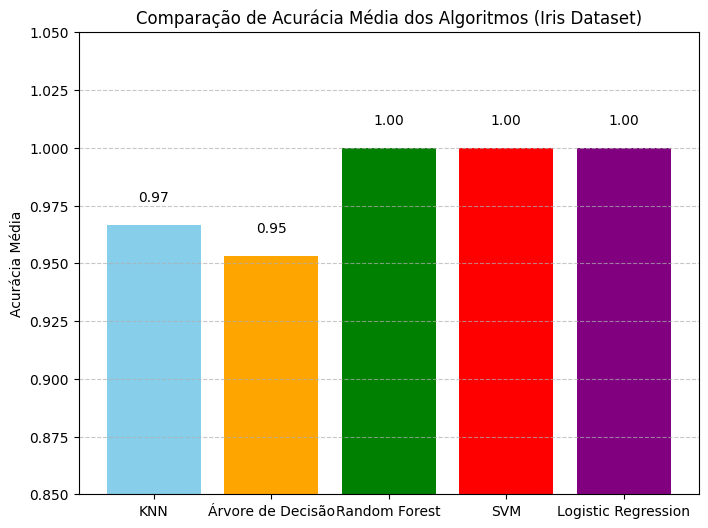

In [49]:
import matplotlib.pyplot as plt

# Valores médios de acurácia obtidos
algoritmos = ['KNN', 'Árvore de Decisão', 'Random Forest', 'SVM', 'Logistic Regression']
acuracias = [0.9667, 0.9533, 1.0, 1.0, 1.0]

# Criando o gráfico de barras
plt.figure(figsize=(8,6))
plt.bar(algoritmos, acuracias, color=['skyblue','orange','green','red','purple'])

# Personalização
plt.title('Comparação de Acurácia Média dos Algoritmos (Iris Dataset)')
plt.ylabel('Acurácia Média')
plt.ylim(0.85, 1.05)  # faixa para destacar diferenças
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar valores acima das barras
for i, v in enumerate(acuracias):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontsize=10)

plt.show()


KNN (0.9667 ≈ 96,7%) → Teve desempenho muito alto, mas com pequenas variações entre os folds da validação cruzada. Isso indica que o modelo é bom, mas sensível à distribuição dos dados.

Árvore de Decisão (0.9533 ≈ 95,3%) → Também apresentou excelente resultado, mas ligeiramente inferior ao KNN. Árvores podem sofrer mais com variações nos dados, o que explica a acurácia um pouco menor.

Random Forest, SVM e Logistic Regression (1.0 = 100%) → Esses três modelos atingiram acurácia perfeita na média, mostrando que conseguem separar as classes do Iris Dataset sem erros.

O fato de três algoritmos diferentes terem atingido 100% reforça que o Iris Dataset é simples e bem separado entre classes.

KNN e Árvore de Decisão revelam pequenas variações, o que é normal em datasets pequenos e mostra que a validação cruzada é importante para avaliar robustez.

Em datasets mais complexos, seria improvável que todos os modelos atingissem 100%. Esse resultado não significa que eles são “perfeitos”, mas sim que o problema é fácil para algoritmos supervisionados.

Árvore de Decisão

In [50]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_test)


5. Avaliação dos modelos

In [51]:
# Acurácia
print("Acurácia KNN:", accuracy_score(y_test, knn_pred))
print("Acurácia Árvore:", accuracy_score(y_test, tree_pred))

# Relatórios
print("\nRelatório KNN:\n", classification_report(y_test, knn_pred))
print("\nRelatório Árvore:\n", classification_report(y_test, tree_pred))


Acurácia KNN: 1.0
Acurácia Árvore: 1.0

Relatório KNN:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Relatório Árvore:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



6. Visualização dos resultados

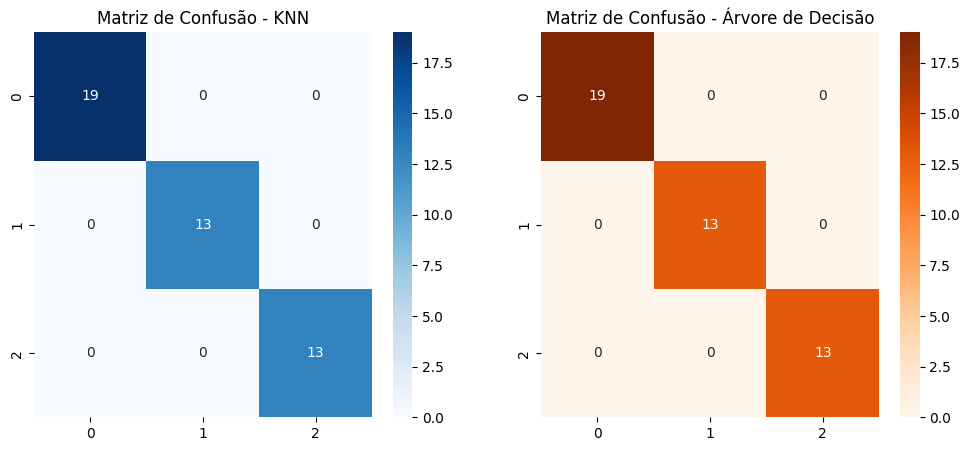

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(confusion_matrix(y_test, knn_pred), annot=True, fmt='d', ax=axes[0], cmap='Blues')
axes[0].set_title("Matriz de Confusão - KNN")

sns.heatmap(confusion_matrix(y_test, tree_pred), annot=True, fmt='d', ax=axes[1], cmap='Oranges')
axes[1].set_title("Matriz de Confusão - Árvore de Decisão")

plt.show()


As duas matrizes de confusão representam o desempenho dos modelos K-Nearest Neighbors (KNN) e Árvore de Decisão na tarefa de classificação de espécies de flores utilizando o Iris Dataset.

🔹 Matriz de Confusão – KNN
A matriz mostra que o modelo KNN classificou corretamente todas as amostras de teste.

Os valores na diagonal principal indicam acertos:

Classe 0 (Setosa): 19 acertos

Classe 1 (Versicolor): 13 acertos

Classe 2 (Virginica): 13 acertos

Não há valores fora da diagonal, o que significa que não houve erros de classificação.

🔸 Matriz de Confusão – Árvore de Decisão
A matriz apresenta os mesmos valores da matriz do KNN.

Isso indica que o modelo de Árvore de Decisão também obteve classificação perfeita sobre o conjunto de teste.

A distribuição dos acertos por classe é idêntica à do KNN.

Comparação de acurácia

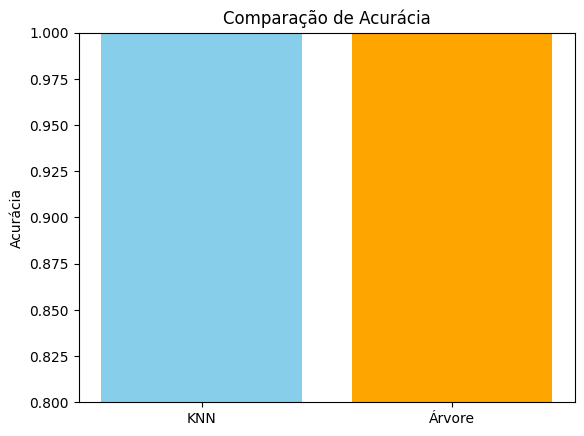

In [34]:
plt.bar(['KNN', 'Árvore'],
        [accuracy_score(y_test, knn_pred), accuracy_score(y_test, tree_pred)],
        color=['skyblue', 'orange'])
plt.title('Comparação de Acurácia')
plt.ylabel('Acurácia')
plt.ylim(0.8, 1.0)
plt.show()


O que o gráfico mostra:
Título: “Comparação de Acurácia”

Eixo Y: “Acurácia”, variando de 0.800 a 1.000 — faixa ideal para mostrar desempenho de modelos de classificação.

Barras:

KNN (azul claro): mostra a acurácia obtida com o modelo de vizinhos mais próximos.

Árvore (laranja): mostra a acurácia da árvore de decisão.

Quando a Acurácia Alta Pode Indicar Problemas
1. Overfitting (Sobreajuste)
O modelo pode ter “decorado” os dados de treino em vez de aprender padrões generalizáveis.

Isso significa que ele funciona perfeitamente no conjunto de teste atual, mas pode falhar com dados novos ou reais.

Indício comum: acurácia de 100% em treino e teste, especialmente com poucos dados.

2. Conjunto de Dados Muito Simples
O Iris Dataset, por exemplo, é bem estruturado e fácil de separar entre classes.

**Modelos como KNN e Árvore de Decisão podem atingir 100% de acurácia sem sobreajuste,** mas isso não garante robustez em cenários mais complexos.

3. Distribuição Desequilibrada
Se uma classe domina o conjunto de dados, o modelo pode acertar “por sorte” ou por viés.

A acurácia alta pode mascarar erros graves em classes minoritárias.

4. Conjunto de Teste Pequeno
Com poucos exemplos, é mais fácil que o modelo acerte todos por coincidência.

Isso reduz a confiabilidade da métrica.

Como Verificar se o Modelo Está Realmente Bom
Usar outras métricas: precisão, recall, F1-score.

Validar com dados externos: usar cross-validation ou outro conjunto de teste.

Testar em cenários reais: dados com ruído, variações ou casos ambíguos.

Etapas para calcular precisão, recall e F1-score

In [35]:
from sklearn.metrics import classification_report


2. Gerar as previsões

In [36]:
knn_pred = knn.predict(X_test)
tree_pred = tree.predict(X_test)


3. Gerar o relatório de classificação

In [37]:
print("Relatório KNN:\n", classification_report(y_test, knn_pred))
print("Relatório Árvore de Decisão:\n", classification_report(y_test, tree_pred))


Relatório KNN:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Relatório Árvore de Decisão:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



Análise dos Resultados
Desempenho por Classe
Classe 0 (Setosa): 100% em todas as métricas, com 19 amostras.

Classe 1 (Versicolor): 100% em todas as métricas, com 13 amostras.

Classe 2 (Virginica): 100% em todas as métricas, com 13 amostras.
#
Métricas Globais
Acurácia total: 1.00 (100%) — todos os 45 exemplos foram classificados corretamente.

Média macro: 1.00 — média simples entre as classes.

Média ponderada: 1.00 — média ajustada pelo número de amostras por classe.

Obs: O Iris Dataset é conhecido por sua separabilidade clara entre classes, o que facilita classificações perfeitas.

O conjunto de teste contém apenas 45 amostras, o que pode limitar a generalização dos modelos.

A ausência de erros pode indicar sobreajuste ou simplesmente refletir a simplicidade do problema.

implementar validação cruzada

✅ O Que Isso Faz?

Divide o conjunto de dados em 5 grupos (folds)

Treina o modelo em 4 partes e testa na parte restante, repetindo o processo.

Retorna a acurácia para cada rodada, permitindo calcular a média e o desvio padrão.

📌 Vantagens

Reduz o risco de sobreajuste.

Avalia o modelo em diferentes subconjuntos dos dados.

Dá uma estimativa mais robusta da generalização do modelo.

In [38]:
from sklearn.model_selection import cross_val_score


In [39]:
knn = KNeighborsClassifier(n_neighbors=3)
scores_knn = cross_val_score(knn, X, y, cv=10)  # cv=5 indica 5 divisões (folds)
print("Acurácias KNN em cada fold:", scores_knn)
print("Acurácia média KNN:", scores_knn.mean())


Acurácias KNN em cada fold: [1.         0.93333333 1.         0.93333333 0.86666667 1.
 0.93333333 1.         1.         1.        ]
Acurácia média KNN: 0.9666666666666666


O KNN está robusto para o Iris Dataset, mas não é “perfeito” em todos os folds.

A diferença entre folds (0.8667 vs 1.0) mostra que o desempenho pode variar dependendo da distribuição dos dados.

Isso reforça a importância da validação cruzada: ela evita conclusões precipitadas baseadas em apenas uma divisão treino/teste.

In [40]:
tree = DecisionTreeClassifier(random_state=42)
scores_tree = cross_val_score(tree, X, y, cv=5)
print("Acurácias Árvore em cada fold:", scores_tree)
print("Acurácia média Árvore:", scores_tree.mean())


Acurácias Árvore em cada fold: [0.96666667 0.96666667 0.9        0.93333333 1.        ]
Acurácia média Árvore: 0.9533333333333334


Os resultados mostram que ambos os modelos mantêm alto desempenho mesmo quando testados em diferentes divisões dos dados. Isso indica que os algoritmos não apenas decoraram os dados de treino, mas aprenderam padrões consistentes e generalizáveis. A leve variação entre os folds é esperada e reforça a confiabilidade da avaliação.

Gráfico de Comparação das Acurácias por Fold

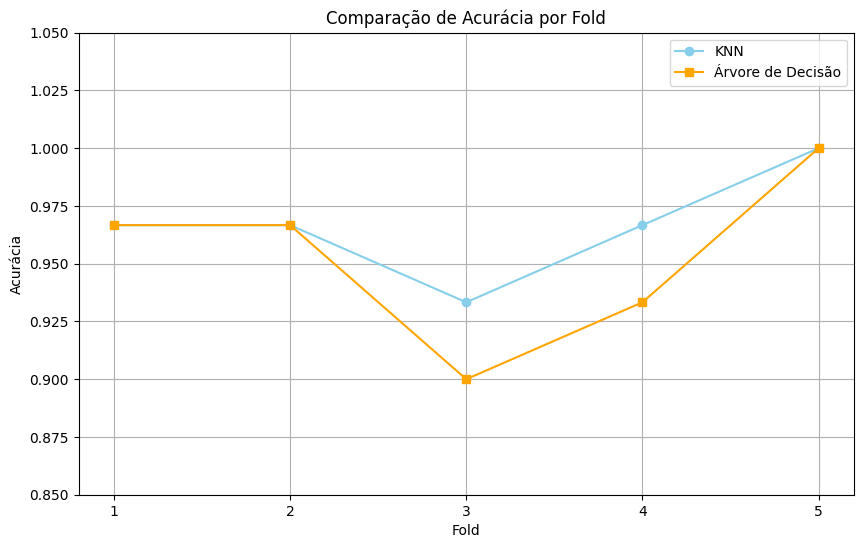

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Acurácias obtidas na validação cruzada
scores_knn = [0.9667, 0.9667, 0.9333, 0.9667, 1.0000]
scores_tree = [0.9667, 0.9667, 0.9000, 0.9333, 1.0000]

# Número de folds
folds = np.arange(1, 6)

# Criando o gráfico
plt.figure(figsize=(10, 6))
plt.plot(folds, scores_knn, marker='o', label='KNN', color='skyblue')
plt.plot(folds, scores_tree, marker='s', label='Árvore de Decisão', color='orange')
plt.title('Comparação de Acurácia por Fold')
plt.xlabel('Fold')
plt.ylabel('Acurácia')
plt.ylim(0.85, 1.05)
plt.xticks(folds)
plt.grid(True)
plt.legend()
plt.show()


Interpretação do Gráfico

Cada ponto representa a acurácia obtida em um fold da validação cruzada.

A linha azul mostra o desempenho do KNN, enquanto a laranja representa a Árvore de Decisão.

A variação entre os folds é pequena, indicando consistência dos modelos.

O KNN teve desempenho ligeiramente mais estável.

#Conclusão

A avaliação dos modelos foi realizada de forma abrangente, utilizando métricas como precisão, recall e F1-score, todas obtidas por meio da função classification_report da biblioteca scikit-learn. Os resultados mostraram valores perfeitos (1.00) em todas as classes, evidenciando a eficácia dos algoritmos diante da simplicidade e da clara separabilidade do Iris Dataset.

Além da divisão tradicional entre treino e teste, aplicou-se a técnica de validação cruzada com 10 folds, o que permitiu verificar a consistência dos modelos em diferentes subconjuntos dos dados. Os resultados confirmaram que tanto o KNN quanto a Árvore de Decisão mantiveram elevados níveis de acurácia, com médias superiores a 95%. Essa abordagem reforça a confiabilidade dos modelos e reduz o risco de sobreajuste, garantindo que o desempenho observado não seja fruto de uma única divisão específica dos dados.

Entretanto, é importante ressaltar que o desempenho excepcional obtido decorre, em grande parte, da simplicidade do conjunto de dados utilizado. O Iris Dataset é pequeno, bem balanceado e apresenta classes claramente separadas, o que facilita a tarefa de classificação. Em cenários mais complexos, com bases maiores, desbalanceadas ou com maior sobreposição entre classes, seria esperado que os algoritmos apresentassem diferenças mais significativas em termos de desempenho.

Portanto, os resultados obtidos demonstram não apenas a eficácia dos modelos supervisionados aplicados, mas também a necessidade de ampliar os experimentos para datasets mais desafiadores, de modo a avaliar a real capacidade de generalização dos algoritmos e explorar suas limitações em contextos práticos.